In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
df_bit=pd.read_csv("Bitcoin prices.csv")

In [3]:
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10


In [4]:
df_bit['DateTime']=pd.to_datetime(df_bit['Date'])
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014-09-18
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014-09-19
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014-09-20
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014-09-21
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,2014-09-22
...,...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10,2023-04-04
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10,2023-04-05
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10,2023-04-06
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10,2023-04-07


In [5]:
df_bit['Year']=df_bit['DateTime'].apply(lambda datetime: datetime.year)
df_bit['Month']=df_bit['Date'].apply(lambda Date: Date.split()[2])
df_bit['Day']=df_bit['DateTime'].apply(lambda DateTime: DateTime.day)
df_bit['WeekDay']=df_bit['Date'].apply(lambda Date: Date.split()[0])
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,Year,Month,Day,WeekDay
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014-09-18,2014,September,18,Thursday
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014-09-19,2014,September,19,Friday
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014-09-20,2014,September,20,Saturday
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014-09-21,2014,September,21,Sunday
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,2014-09-22,2014,September,22,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10,2023-04-04,2023,April,4,Tuesday
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10,2023-04-05,2023,April,5,Wednesday
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10,2023-04-06,2023,April,6,Thursday
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10,2023-04-07,2023,April,7,Friday


In [6]:
df_bit['High'] = pd.cut(df_bit['High'], bins=5, labels=False)
X = df_bit.drop(['Date','DateTime','WeekDay','Month',"High"], axis=1)
y = df_bit['High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print("score:", r2_score)

score: 0.9641497722697991


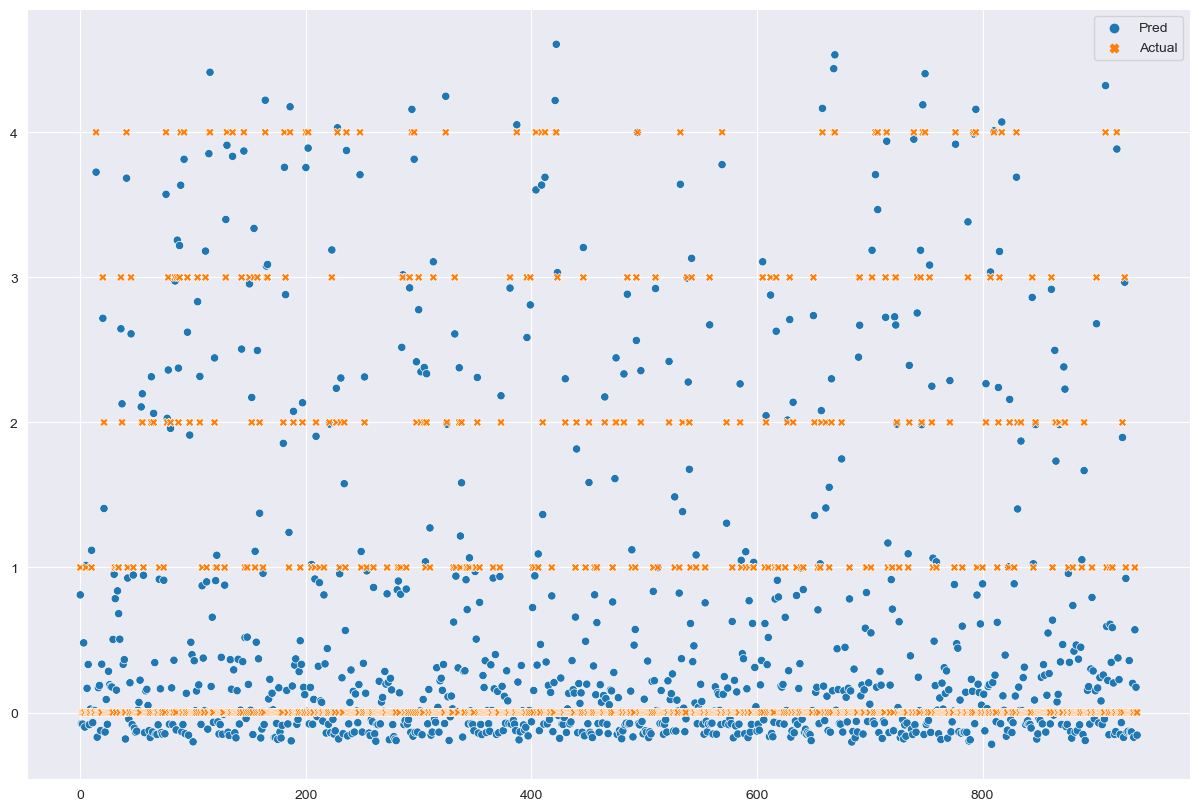

In [7]:
df= pd.DataFrame(data = [y_pred, y_test]).T
df.columns = ['Pred', 'Actual']
plt.figure(figsize=(15,10))
sns.scatterplot(df)
plt.show()

In [8]:
df

,Pred,Actual
0,0.811004,1.0
1,-0.076930,0.0
2,-0.080089,0.0
3,0.480153,0.0
4,-0.100367,0.0
...,...,...
933,0.201137,0.0
934,-0.170937,0.0
935,0.570361,1.0
936,0.174078,0.0


In [9]:
df_bit['Open'] = pd.cut(df_bit['Open'], bins=5, labels=False)

X1 = df_bit.drop(['Date','DateTime','Month','WeekDay','Open','High','Volume','Low','Adj Close',"Year",'Day'], axis=1)
y1 = df_bit['Open']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X1_train, y1_train)
y1_pred = rfc.predict(X1_test)
accuracy = accuracy_score(y1_test, y1_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9808102345415778


In [10]:
df1= pd.DataFrame(data = [y1_pred, y1_test]).T
df1.columns = ['Pred', 'Actual']
df1

,Pred,Actual
0,0,0
1,3,3
2,4,4
3,0,0
4,0,0
...,...,...
933,0,0
934,0,0
935,0,0
936,3,3


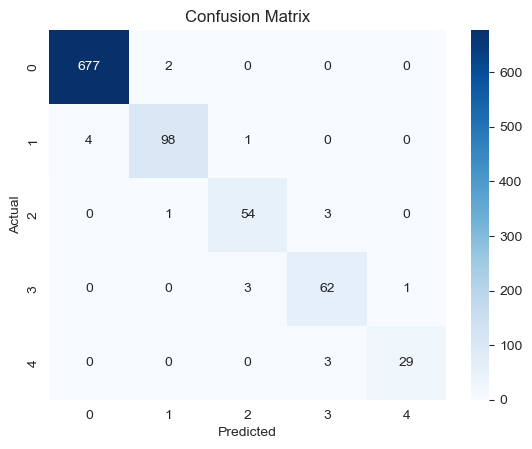

In [11]:
cm = confusion_matrix(y1_test, y1_pred)
labels = np.unique(y1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
df_bit['Close'] = pd.cut(df_bit['Close'], bins=5, labels=False)

X2 = df_bit.drop(['Date','DateTime','Month','WeekDay','High','Volume','Adj Close',"Year",'Day','Close'],axis=1)
y2 = df_bit['Close']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
dtc = DecisionTreeClassifier()
dtc.fit(X2_train, y2_train)
y2_pred = dtc.predict(X2_test)
dtc.score(X2_test, y2_test)


0.9733475479744137

In [13]:
df2= pd.DataFrame(data = [y2_pred, y2_test]).T
df2.columns = ['Pred', 'Actual']
df2

,Pred,Actual
0,0,0
1,0,0
2,0,0
3,2,2
4,1,1
...,...,...
933,0,0
934,0,0
935,0,0
936,0,0


In [14]:
df_bit['Low'] = pd.cut(df_bit['Low'], bins=5, labels=False)
X3 = df_bit.drop(['Date', 'DateTime', 'Month', 'WeekDay', "Low",],axis=1)
y3 = df_bit['Low']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X3_train, y3_train)
y3_pred = knn.predict(X3_test)
mse = mean_squared_error(y3_test, y3_pred)
print("Mean squared error:", mse)
accuracy = accuracy_score(y3_test, y3_pred)
print("Accuracy:", accuracy)

Mean squared error: 1.20682302771855
Accuracy: 0.67590618336887


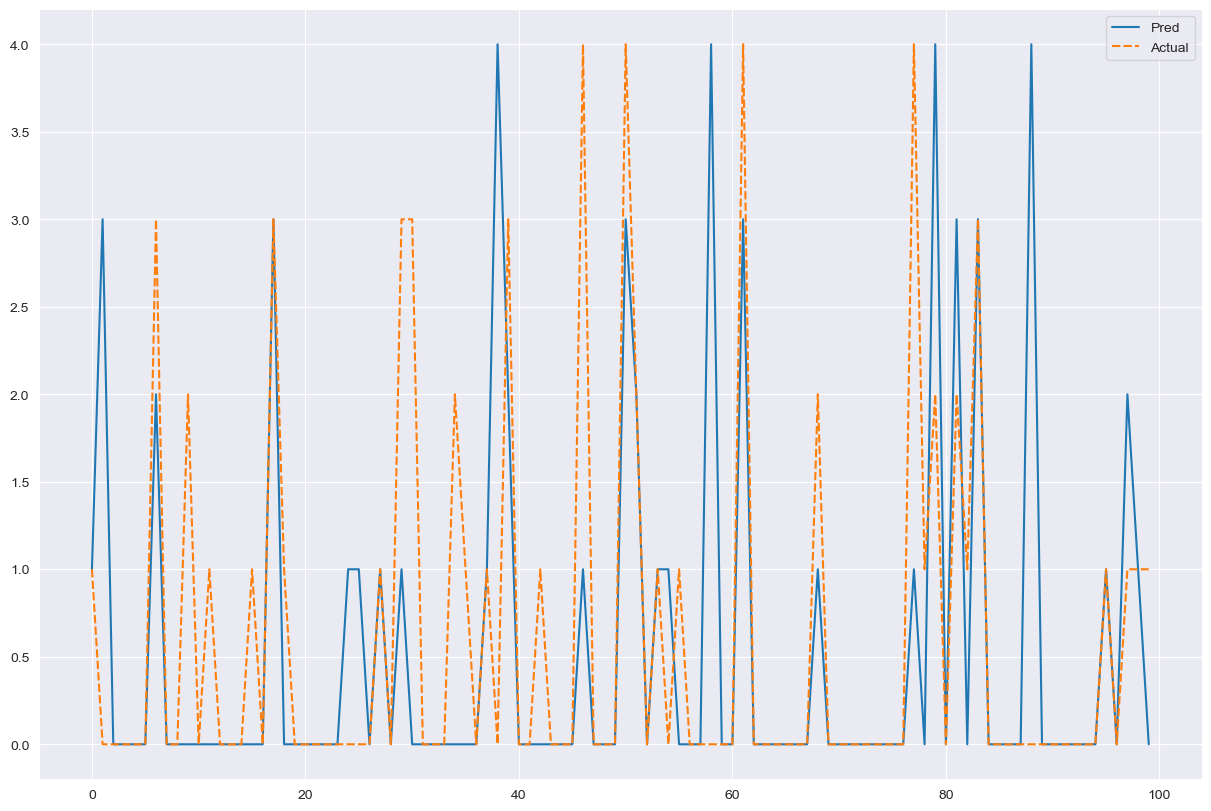

In [15]:
df3 = pd.DataFrame(data=[y3_pred, y3_test]).T
df3.columns = ['Pred', 'Actual']
plt.figure(figsize=(15, 10))
sns.lineplot(df3.head(100))
plt.show()

In [16]:
X4 = df_bit.drop(['Date','DateTime','Month','WeekDay','Volume','Adj Close',"Year",'Day','Low'],axis=1)
y4 = df_bit['Low']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X4_train, y4_train)
y4_pred = nb.predict(X4_test)
print('Accuracy:', accuracy_score(y4_test, y4_pred))
print('Confusion Matrix:\n', confusion_matrix(y4_test, y4_pred))
print('Classification Report:\n', classification_report(y4_test, y4_pred))

Accuracy: 0.9856
Confusion Matrix:
 [[456   1   0   0   0]
 [  0  73   0   0   0]
 [  0   0  36   6   0]
 [  0   0   0  37   0]
 [  0   0   0   2  14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       0.99      1.00      0.99        73
           2       1.00      0.86      0.92        42
           3       0.82      1.00      0.90        37
           4       1.00      0.88      0.93        16

    accuracy                           0.99       625
   macro avg       0.96      0.95      0.95       625
weighted avg       0.99      0.99      0.99       625



C:\Users\saish\AppData\Local\Temp\ipykernel_10844\372131060.py:4: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  chart=sns.scatterplot(df4.head(100),markers='d')


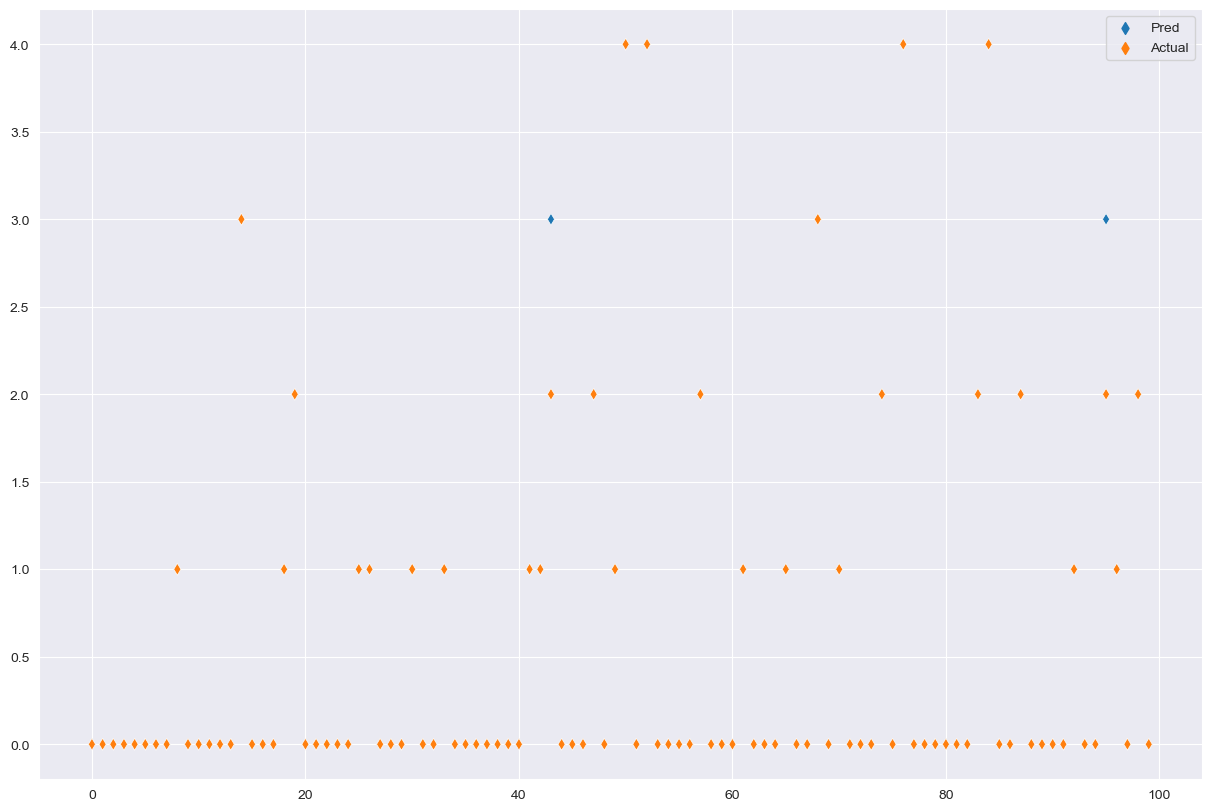

In [17]:
df4 = pd.DataFrame(data=[y4_pred, y4_test]).T
df4.columns = ['Pred', 'Actual']
plt.figure(figsize=(15,10))
chart=sns.scatterplot(df4.head(100),markers='d')
plt.show()

In [18]:
df_bit['Volume'] = pd.cut(df_bit['Volume'], bins=10, labels=False)
X5 = df_bit.drop(['Date','Month','WeekDay','Day','Year','DateTime','Volume'], axis=1) # Features
y5 = df_bit['Volume']
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3)
scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.transform(X5_test)
svm = SVC(kernel='linear', C=1.0)
svm.fit(X5_train, y5_train)
y5_pred = svm.predict(X5_test)
accuracy = accuracy_score(y5_test, y5_pred)
print('Accuracy:', accuracy)
print(confusion_matrix(y5_test, y5_pred))
print(classification_report(y5_test, y5_pred))

Accuracy: 0.8507462686567164
[[798   0   0   0]
 [129   0   0   0]
 [  9   0   0   0]
 [  2   0   0   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       798
           1       0.00      0.00      0.00       129
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         2

    accuracy                           0.85       938
   macro avg       0.21      0.25      0.23       938
weighted avg       0.72      0.85      0.78       938



C:\Users\saish\.conda\envs\python pycharm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saish\.conda\envs\python pycharm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saish\.conda\envs\python pycharm\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
df5 = pd.DataFrame(data=[y5_pred, y5_test]).T
df5.columns = ['Pred', 'Actual']
df5

,Pred,Actual
0,0,1
1,0,2
2,0,0
3,0,1
4,0,0
...,...,...
933,0,0
934,0,0
935,0,0
936,0,0


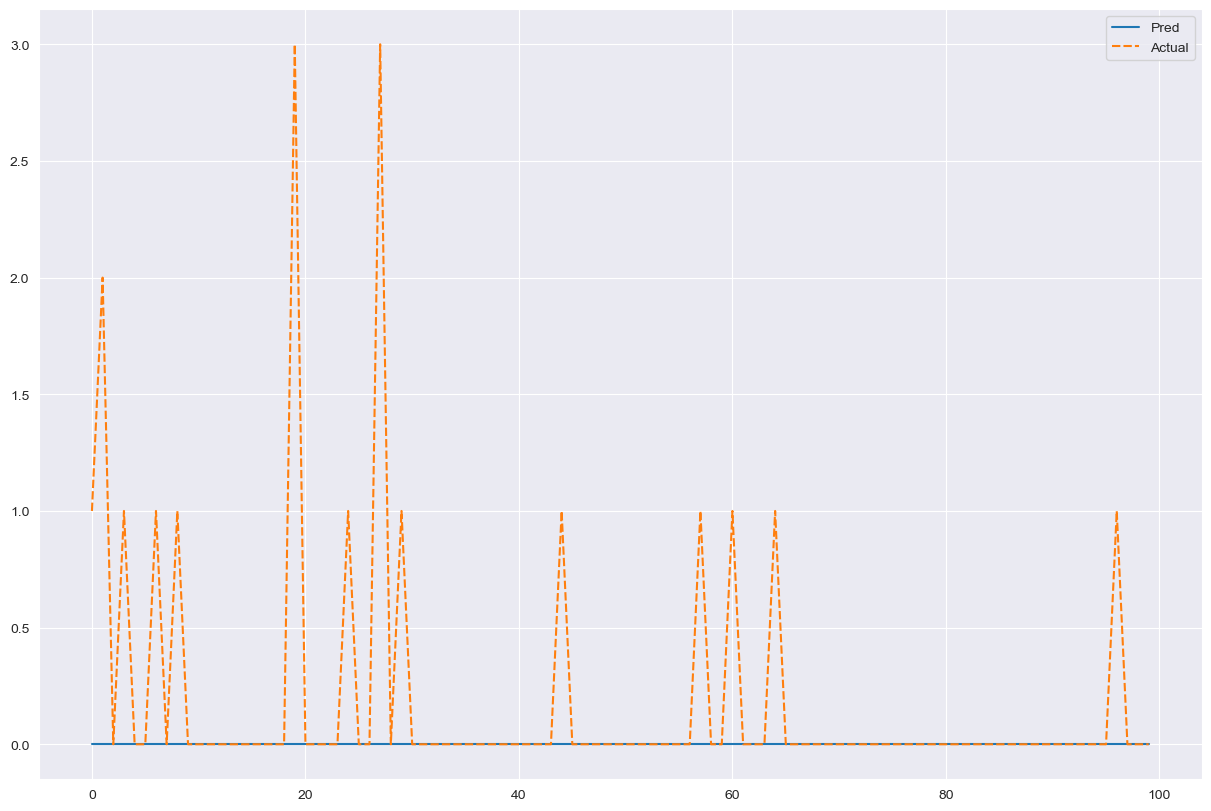

In [20]:
plt.figure(figsize=(15,10))
sns.lineplot(df5.head(100))
plt.show()